# Add Plots and Widgets
Welcome to the **Adding Plots And Widgets** notebook! In this tutorial we will cover the steps involved in overlaying images on top of the plot.
In this notebook, you will learn how to:
* Add premade widgets A showcase of prebuilt widgets.
  * This inlcudes an overview of all available widgets.
* How to add premade widgets in an animation.
* How to overlay your own custom matplotlib figures to an animation.

In [1]:
import accessvis
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Adding Premade Widgets
Below we are showcasing some existing widgets which may be of interest to you.



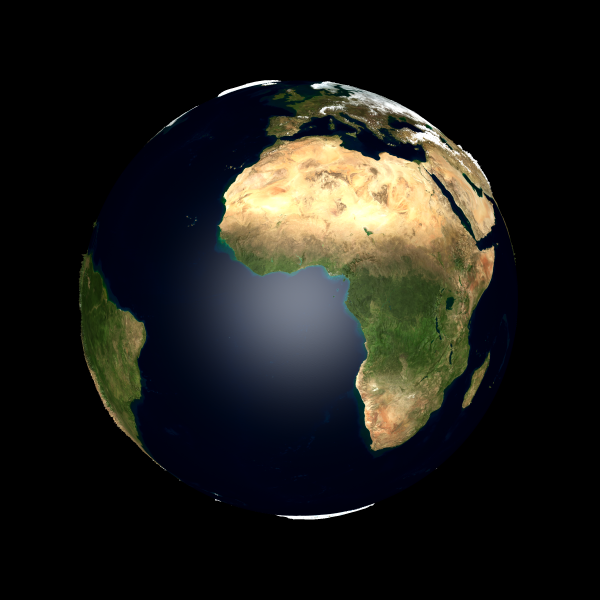

In [2]:
lv = accessvis.plot_earth(texture='bluemarble', waves=True, background='black', vertical_exaggeration=30, )
lv.set_properties(diffuse=0.6, ambient=0.85, specular=0.25, shininess=0.03, light=[1,1,0.98,1], lightpos=[0,0,10000,1])
lv.display(resolution=(600,600))


Here we add the widgets. 
Note that we first create a Widget() object, and then we call update_widget() to update/show the widget. `update_widget()` is where we provide details which can change and is useful for animations, as you will see later.

To test adding a static image, uncomment the line and update the path to your image.

Some tips:
* `scale` refers to the height of the widget. If it is 1, then the widget will span the full height of the image.
* `offset` refers to where in the image it will appear. (0,0) is top left, (1,1) is bottom right.
Other kwargs are specific to each widget, but some of the common examples are:
* `text_colour` - a matplotlib compatable colour (e.g. you can use words, or rgb values)
* `background` a matplotlib compatable colour.



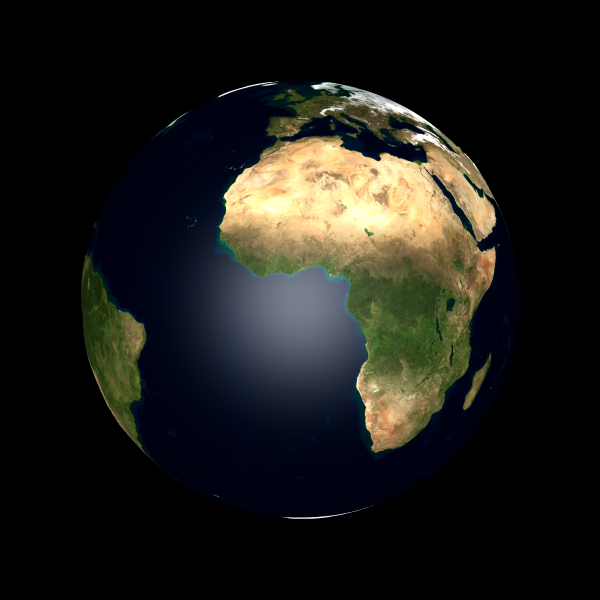


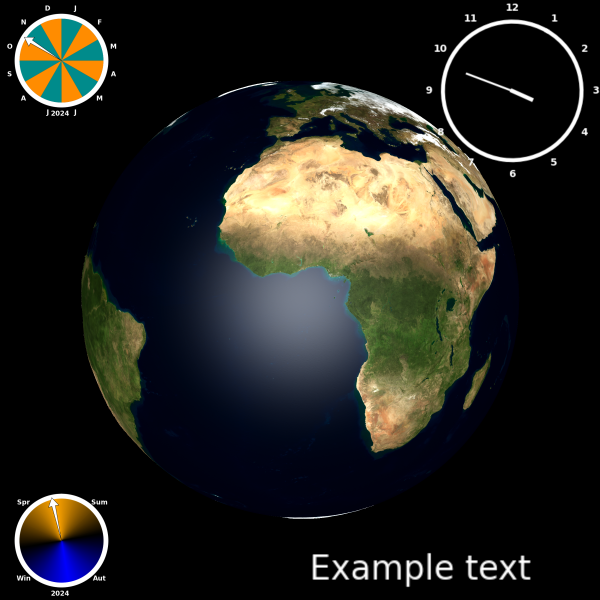

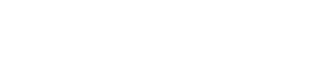

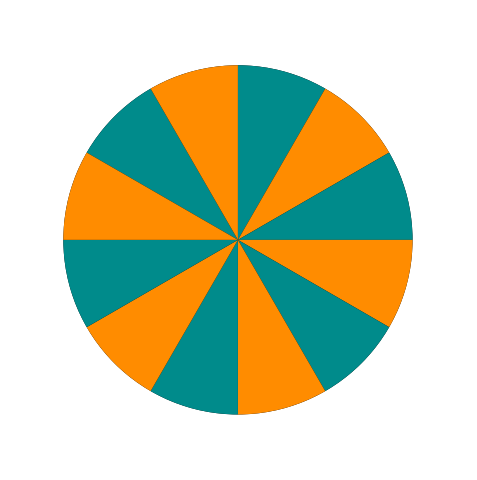

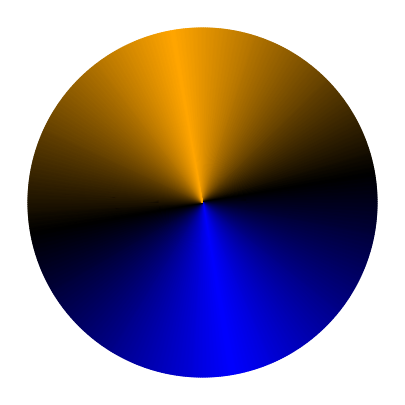

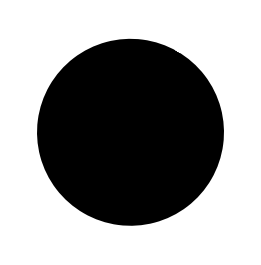

In [3]:
lv = accessvis.plot_earth()
lv.set_properties(diffuse=0.6, ambient=0.85, specular=0.25, shininess=0.03, light=[1,1,0.98,1], lightpos=[0,0,10000,1])
lv.display(resolution=(600,600))

accessvis.TextWidget(lv=lv, text_colour = 'white', scale=0.1, offset=(1,1)).update_widget(text='Example text')
accessvis.CalendarWidget(lv=lv, text_colour = 'white', scale=0.2, offset=(0,0)).update_widget(date=datetime.now())
accessvis.SeasonWidget(lv=lv, text_colour = 'white', scale=0.2, offset=(0,1)).update_widget(date=datetime.now())
clock = accessvis.ClockWidget(lv=lv, text_colour = 'white', background = 'black', scale=0.3, offset=(1,0)) # Just wait. you'll see why we did it this way in the next cell.
clock.update_widget(time=datetime.now())
# accessvis.ImageWidget(lv=lv, scale=0.2, offset=(0.5,0.5), file_path='/path/to/your/image.png').update_widget()
lv.display(resolution=(600,600))

You can also easily remove widgets if you still have access the the Widget object. Lets remove the clock.


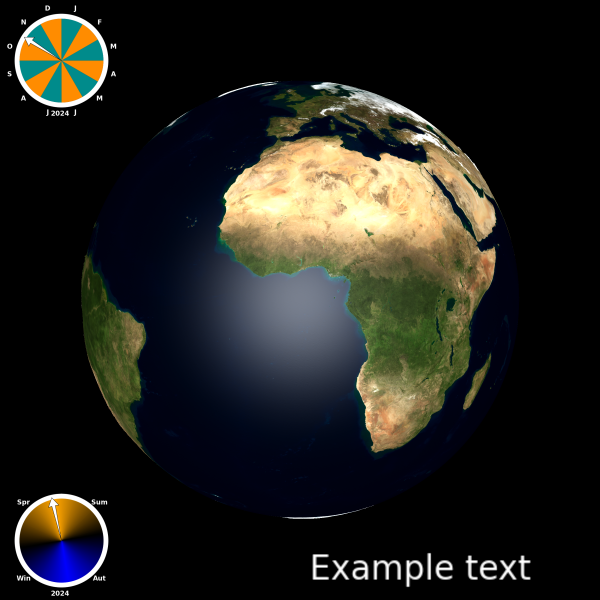

In [4]:
clock.remove()
lv.display(resolution=(600,600))

You can also list all available premade widgets.

In [5]:
accessvis.list_widgets()

['WidgetMPL', 'ImageWidget']

## Simple Widget Animation
Below we create a basic animation, showing a large number counting up.
First we create the widget object, in this case `accessvis.TextWidget`.

To update the widget, we simply call `update_widget()`. This method handles removing the old state and adding the new. 

Look at 04_animations.ipynb to learn how to animate the Earth. 

Output #0, mp4, to 'count_overlay.mp4':
  Stream #0:0: Unknown: none


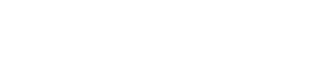

In [6]:
filename = 'count_overlay.mp4'
lv = accessvis.plot_earth()
wid = accessvis.TextWidget(lv=lv, scale = 0.3, offset = (0.5,0.5))
length = 20

with lv.video(filename=filename, quality=1, fps=10, resolution=(600,600)) as v:
    for i in range(length):

        wid.update_widget(text=str(i))
        
        for _ in range(10): # render one second
            lv.render()

## Custom Matplotlib Figure
Below we create a custom matplotlib plot, which changes over time. This requires us to subclass `accessvis.WidgetMPL` and implement the abstract methods. If you want to use another package, you can do so by subclassing `accessvis.Widget` and implementing the _make_pixels method.

`accessvis.WidgetMPL` has three abstract methods:
* `_make_mpl()` - this should return (plt.Figure, plt.Axes). Use this method to adjust things such as axis labels, scale, colours, and any other features which do not change.
* `_update_mpl()` - This is where you add features which change.
* `_reset_mpl()` - This resets the graph. This method should undo any changes made in _update_mpl().

In our example below, we begin by plotting all data (`_make_mpl`). Bext we add a moving dot to highlight a particular datapoint (`_update_mpl`). Finally, we remove the point we just added (`_reset_mpl`)

In [7]:
class GraphWidget(accessvis.WidgetMPL):
    def __init__(self, lv, xmax=20, **kwargs):
        super().__init__(lv=lv, **kwargs) # This line allows us to pass through scale and offset
        
        self.xmax=xmax
        self.xdata = list(range(10,self.xmax)) # dummy data
        self.ydata = np.log(self.xdata)

        self.highlight = None # matplotlib object we will add/remove via the update/reset methods.
        
    def _make_mpl(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(self.xdata, self.ydata)
        return fig,ax

    def _update_mpl(self,fig, ax, index=0):
        self.highlight = ax.scatter([self.xdata[index]], self.ydata[index], c='r', marker='o', s=100) # making a big red dot

    def _reset_mpl(self, fig, ax, **kwargs):
        if self.highlight is not None:
            self.highlight.remove()


It's animation time!
Notice how this code is nearly identical to the previous animation.
We begin by creating our widget object, and then call update_widget when we want it to change.

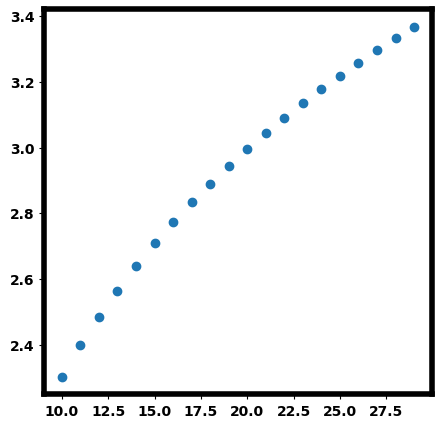

In [8]:
filename = 'graph_widget.mp4'
lv = accessvis.plot_earth()
length = 20
wid = GraphWidget(lv=lv, xmax = 10+length, scale = 0.3, offset = (0.5,0.5))
with lv.video(filename=filename, quality=1, fps=10, resolution=(600,600)) as v:
    for i in range(length):
        wid.update_widget(index=i)
        for _ in range(10): # render one second
            lv.render()
